# 第3部 時系列分析のその他のトピック

## パッケージインポート

In [1]:
# !pip install arch
!pip install armagarch

In [2]:
import armagarch as ag
import datetime
import numpy as np
import pandas as pd
import pmdarima as pm
import seaborn as sns
import scipy as sp 
import matplotlib.pyplot as plt
import itertools
import random
import statsmodels.graphics.api as smg
import statsmodels.tsa.api as tsa
import statsmodels.api as sm

from arch import arch_model
from dateutil.relativedelta import relativedelta
from statsmodels.graphics.tsaplots import plot_acf
from rdatasets import data
# from pydataset import data


%matplotlib inline
# sns.set(font="DejaVu Sans") #seabornを日本語対応

## 第3部-1章 見せかけの回帰とその対策

In [3]:
# ホワイトノイズへの回帰分析
n_sample = 400

y_wn = np.random.normal(
        loc   = 0,      # 平均
        scale = 1,      # 標準偏差
        size  = n_sample,# 出力配列のサイズ
    )

x_wn = np.random.normal(
        loc   = 0,      # 平均
        scale = 1,      # 標準偏差
        size  = n_sample,# 出力配列のサイズ
    )

model_wn = sm.OLS(y_wn, x_wn)
res_wn = model_wn.fit()
res_wn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.002
Method:                 Least Squares   F-statistic:                            0.05629
Date:                Wed, 22 Sep 2021   Prob (F-statistic):                       0.813
Time:                        21:26:31   Log-Likelihood:                         -559.82
No. Observations:                 400   AIC:                                      1122.
Df Residuals:                     399   BIC:                                      1126.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0119      0.050      0.237      0.813      -0.087       0.110
==============================================================================
Omnibus:                        9.453   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                6.028
Skew:                           0.140   Prob(JB):                       0.0491
Kurtosis:                       2.468   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
# 単位根のあるデータ同士の回帰分析
n_sample = 400

y_rw = np.cumsum(np.random.normal( # np.cumsum(): 累積和を計算し、ランダムウォークを取得
        loc   = 0,      # 平均
        scale = 1,      # 標準偏差
        size  = n_sample,# 出力配列のサイズ
    ))

x_rw = np.cumsum(np.random.normal(
        loc   = 0,      # 平均
        scale = 1,      # 標準偏差
        size  = n_sample,# 出力配列のサイズ
    ))

model_rw = sm.OLS(y_rw, x_rw)
res_rw = model_rw.fit()
res_rw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.039
Model:                            OLS   Adj. R-squared (uncentered):              0.036
Method:                 Least Squares   F-statistic:                              16.05
Date:                Wed, 22 Sep 2021   Prob (F-statistic):                    7.35e-05
Time:                        21:26:31   Log-Likelihood:                         -1983.4
No. Observations:                 400   AIC:                                      3969.
Df Residuals:                     399   BIC:                                      3973.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8454      0.211      4.007      0.000       0.431       1.260
==============================================================================
Omnibus:                       23.710   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.003
Skew:                          -0.420   Prob(JB):                     0.000123
Kurtosis:                       2.387   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

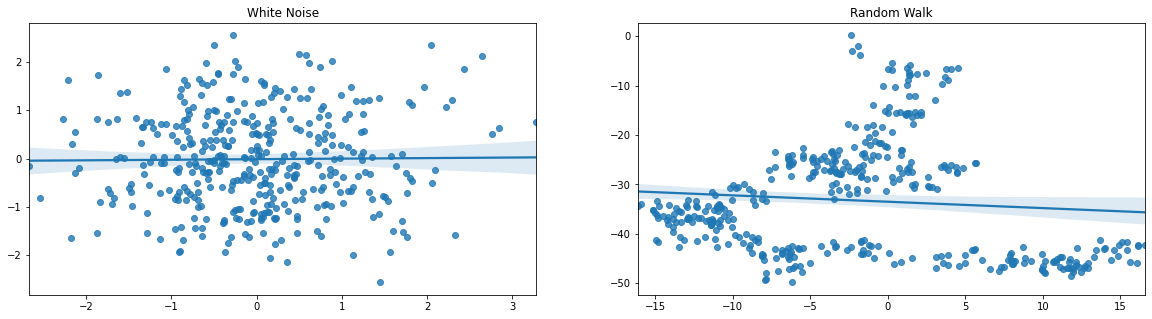

In [5]:
f, ax= plt.subplots(1,2, figsize=(20,5))
ax[0] = sns.regplot(x=x_wn, y=y_wn, ax=ax[0])
ax[0].set_title('White Noise');

ax[0] = sns.regplot(x=x_rw, y=y_rw, ax=ax[1])
ax[0].set_title('Random Walk');

In [6]:
n_sample = 400
ar = np.full(400, 0.8)
ar[0] = 1
ma = np.full(400, 0)
ma[0] = 1

y_ar = tsa.arma_generate_sample(ar=ar, ma=ma, nsample=n_sample)
x_ar = tsa.arma_generate_sample(ar=ar, ma=ma, nsample=n_sample)

model_ar = sm.OLS(y_ar, x_ar)
res_ar = model_ar.fit()
res_ar.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              1.279
Date:                Wed, 22 Sep 2021   Prob (F-statistic):                       0.259
Time:                        21:26:31   Log-Likelihood:                         -664.23
No. Observations:                 400   AIC:                                      1330.
Df Residuals:                     399   BIC:                                      1334.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0556      0.049      1.131      0.259      -0.041       0.152
==============================================================================
Omnibus:                        1.826   Durbin-Watson:                   2.738
Prob(Omnibus):                  0.401   Jarque-Bera (JB):                1.614
Skew:                           0.020   Prob(JB):                        0.446
Kurtosis:                       2.691   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
#Durbin-Watson検定
resid_ols = res_rw.resid
dw = sum(np.diff(resid_ols) ** 2)/sum(resid_ols ** 2)
dw

# 残差の1次の自己相関が0の場合、DW統計量はおよそ2になる。

0.0014419233936942433

In [8]:
print('Durbin-Watson Test')
print(f'random work: {sm.stats.durbin_watson(res_rw.resid)}')
print(f'white noise: {sm.stats.durbin_watson(res_wn.resid)}')
print(f'AR model: {sm.stats.durbin_watson(res_ar.resid)}')

Durbin-Watson Test
random work: 0.0014419233936942446
white noise: 2.063620818367972
AR model: 2.738071845400804


In [9]:
# シミュレーションによる見せかけの回帰
res_wn.pvalues
n_sim = 200 #シミュレーション回数
n_sample = 400 #1シミュレーションのサンプルサイズ

y_wn = [np.random.normal(size = n_sample) for i in range(n_sim)]
x_wn = [np.random.normal(size = n_sample) for i in range(n_sim)]
p_wn = [sm.OLS(y_wn[i], x_wn[i]).fit().pvalues[0] for i in range(n_sim)]

y_rw = [np.cumsum(np.random.normal(size = n_sample)) for i in range(n_sim)]
x_rw = [np.cumsum(np.random.normal(size = n_sample)) for i in range(n_sim)]
p_rw = [sm.OLS(y_rw[i], x_rw[i]).fit().pvalues[0] for i in range(n_sim)]

# ホワイトノイズb
print(sum([i < 0.05 for i in p_wn])/n_sim)

# ランダムウォーク
# 非常に高い確率で有意になってしまう
print(sum([i < 0.05 for i in p_rw])/n_sim)

0.025
0.91


In [10]:
# 単位根検定
print(tsa.adfuller(y_rw[0], regression='nc'))
print(tsa.adfuller(x_rw[0], regression='nc'))
# ともに、統計量の絶対値が棄却店の絶対値を下回る

(0.03306050597652611, 0.6951686933392109, 0, 399, {'1%': -2.57136629129214, '5%': -1.9416938282226064, '10%': -1.6161709841714416}, 1083.626901971033)
(-1.63198742556815, 0.09695056152725523, 0, 399, {'1%': -2.57136629129214, '5%': -1.9416938282226064, '10%': -1.6161709841714416}, 1106.986966510232)


In [11]:
# Prais-Winsten法
# 手実装は省略
mod_gls_PW = sm.GLS(y_ar, x_ar)
res_gls_PW = mod_gls_PW.fit()
res_gls_PW.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 GLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.003
Model:                            GLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              1.279
Date:                Wed, 22 Sep 2021   Prob (F-statistic):                       0.259
Time:                        21:26:32   Log-Likelihood:                         -664.23
No. Observations:                 400   AIC:                                      1330.
Df Residuals:                     399   BIC:                                      1334.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0556      0.049      1.131      0.259      -0.041       0.152
==============================================================================
Omnibus:                        1.826   Durbin-Watson:                   2.738
Prob(Omnibus):                  0.401   Jarque-Bera (JB):                1.614
Skew:                           0.020   Prob(JB):                        0.446
Kurtosis:                       2.691   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# 差分系列への回帰分析
y_rw = np.cumsum(np.random.normal( # np.cumsum(): 累積和を計算し、ランダムウォークを取得
        loc   = 0,      # 平均
        scale = 1,      # 標準偏差
        size  = n_sample,# 出力配列のサイズ
    ))

x_rw = np.cumsum(np.random.normal(
        loc   = 0,      # 平均
        scale = 1,      # 標準偏差
        size  = n_sample,# 出力配列のサイズ
    ))

mod_lm_diff = sm.OLS(np.diff(y_rw), np.diff(x_rw))
res_lm_diff = mod_lm_diff.fit()
res_lm_diff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.002
Method:                 Least Squares   F-statistic:                            0.09967
Date:                Wed, 22 Sep 2021   Prob (F-statistic):                       0.752
Time:                        21:26:32   Log-Likelihood:                         -540.59
No. Observations:                 399   AIC:                                      1083.
Df Residuals:                     398   BIC:                                      1087.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0163      0.052     -0.316      0.752      -0.118       0.085
==============================================================================
Omnibus:                        1.006   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.605   Jarque-Bera (JB):                1.104
Skew:                          -0.088   Prob(JB):                        0.576
Kurtosis:                       2.811   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# 共和分
rw = np.cumsum(np.random.normal(
        size  = n_sample,# 出力配列のサイズ
    ))

x_co = 0.6 * rw + np.random.normal(size  = n_sample)
y_co = 0.4 * rw + np.random.normal(size  = n_sample)


#ADF統計量が各%の基準値より大きい→単位根を持つという帰無仮説を棄却できない
print(tsa.adfuller(x_co, regression='nc'))
print(tsa.adfuller(y_co, regression='nc'))

(-1.6030827553806322, 0.10268760372378333, 4, 395, {'1%': -2.5714234994391925, '5%': -1.9417010604353815, '10%': -1.6161645780313525}, 1320.2741692047962)
(-1.6849414734716621, 0.08707907605547394, 4, 395, {'1%': -2.5714234994391925, '5%': -1.9417010604353815, '10%': -1.6161645780313525}, 1253.5804515633674)


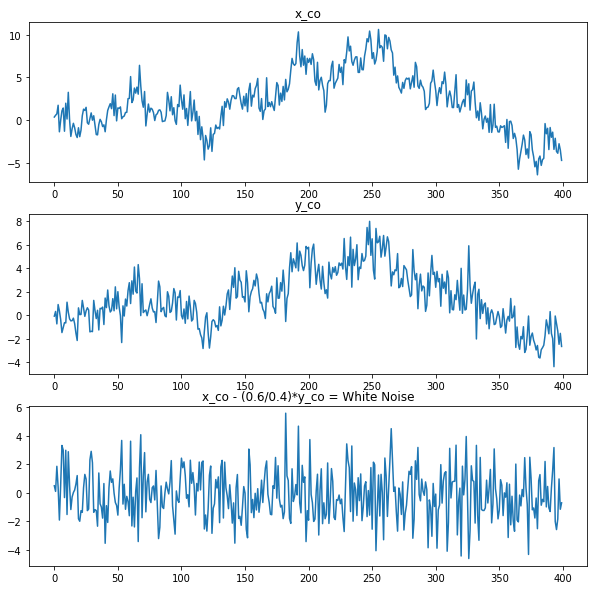

In [14]:
f, ax= plt.subplots(3,1, figsize=(10,10))
pd.Series(x_co).plot(ax=ax[0])
pd.Series(y_co).plot(ax=ax[1])
pd.Series(x_co - (0.6/0.4)*y_co).plot(ax=ax[2])
ax[0].set_title('x_co');
ax[1].set_title('y_co');
ax[2].set_title('x_co - (0.6/0.4)*y_co = White Noise');

## 第3部-2章 VARモデル

In [15]:
df = pd.read_csv('input/usconsumption.txt', delimiter="\t")
df['yyyyq'] = df['year'].astype(str).str.cat(df['quarter'])
df['yyyyq'] = pd.to_datetime(df['yyyyq'])
df['yyyyq']

df.set_index('yyyyq', inplace=True)

In [16]:
df

,year,quarter,consumption,income
yyyyq,,,,
1970-01-01,1970,Q1,0.612277,0.496540
1970-04-01,1970,Q2,0.454930,1.736460
1970-07-01,1970,Q3,0.874673,1.344881
1970-10-01,1970,Q4,-0.272514,-0.328146
1971-01-01,1971,Q1,1.892187,1.965432
...,...,...,...,...
2009-10-01,2009,Q4,0.109329,-0.144713
2010-01-01,2010,Q1,0.671018,1.187165
2010-04-01,2010,Q2,0.717718,1.354355


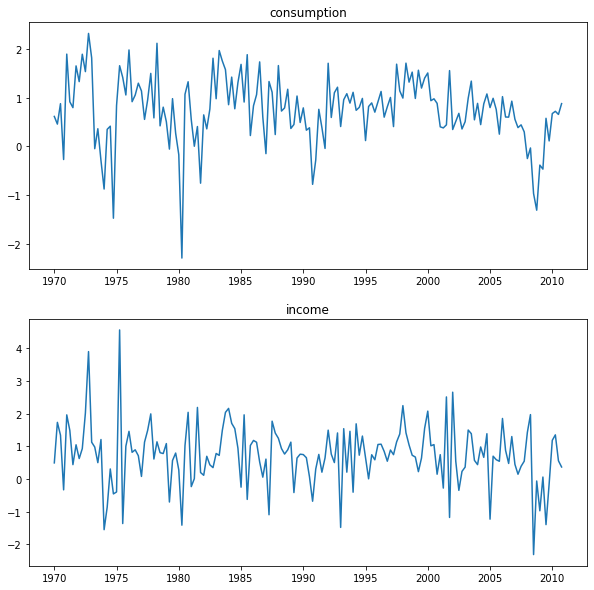

In [17]:
f, ax= plt.subplots(2,1, figsize=(10,10))
ax[0].plot(df['consumption'])
ax[1].plot(df['income'])
ax[0].set_title('consumption');
ax[1].set_title('income');

In [18]:
# ADF統計量が各%の基準値より大きい→単位根を持つという帰無仮説を棄却する→単位根を持たない
print(tsa.adfuller(df['consumption'], regression='c'))
print(tsa.adfuller(df['income'], regression='c'))

(-4.262008692190416, 0.0005165365417310952, 2, 161, {'1%': -3.471633386932248, '5%': -2.8796651107461972, '10%': -2.576433647235832}, 280.8240564829317)
(-13.359837940816236, 5.455692400095391e-25, 0, 163, {'1%': -3.471118535474365, '5%': -2.8794405060097024, '10%': -2.576313761526591}, 401.5921377988525)


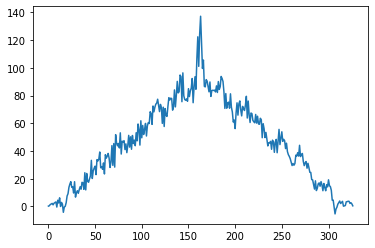

In [19]:
# 相互相関の算出
corr=np.correlate(df['consumption'], df['income'], "full")
plt.plot(corr)

In [20]:
# RによるVARモデル
mod_var = tsa.VAR(df[["consumption", "income"]])
res_var = mod_var.fit(maxlags=1, ic="aic")
res_var.summary()

C:\Users\sk0ea\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 22, Sep, 2021
Time:                     21:26:33
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -1.14096
Nobs:                     163.000    HQIC:                  -1.20861
Log likelihood:          -354.304    FPE:                   0.285123
AIC:                     -1.25484    Det(Omega_mle):        0.274910
--------------------------------------------------------------------
Results for equation consumption
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.462032         0.077303            5.977           0.000
L1.consumption         0.308909         0.081416            3.794           0.000
L1.income              0.082665         0.060070  

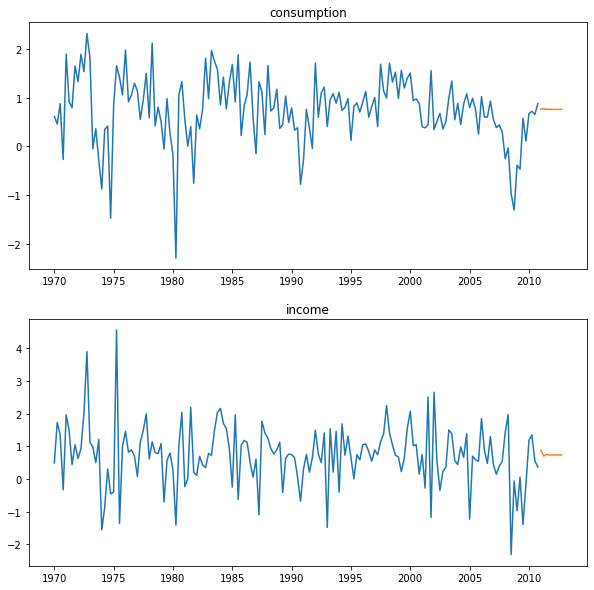

In [21]:
# VARモデルによる予測
y_pred = res_var.forecast(res_var.endog, steps=8)
df_pred_index = [datetime.datetime(2011, 1, 1) + relativedelta(months=i*3) for i in range(8)]

df_pred = pd.DataFrame({'consumption': y_pred[:, 0], 'income': y_pred[:, 1]}, index=df_pred_index)

# 予測結果の描画
f, ax= plt.subplots(2,1, figsize=(10,10))
ax[0].plot(df['consumption'])
ax[0].plot(df_pred['consumption'])
ax[1].plot(df['income'])
ax[1].plot(df_pred['income'])
ax[0].set_title('consumption');
ax[1].set_title('income');

In [22]:
# RによるGranger因果性検定

# Granger因果: 相手がいることによって予測精度が上がるかを判断する。
# 帰無仮説: 予測残差は減少しない 対立仮説: 予測残差が減少する→Grangerの因果関係があるとする

# VARResults.test_causality(caused, causing=None, kind='f', signif=0.05)
print(res_var.test_causality("consumption", "income").summary())
print()
print(res_var.test_causality("income", "consumption").summary())
# 消費→収入方向に因果はあるが、収入→消費方向に因果はない

# grangercausalitytests(df[["a", "b"]], 1): b列がa列にGranger因果を及ぼすかどうかを検定する
# from statsmodels.tsa.stattools import grangercausalitytests
# test_i2c = grangercausalitytests(df[["consumption", "income"]], 1)
# test_c2i = grangercausalitytests(df[["income", "consumption"]], 1)


Granger causality F-test. H_0: income does not Granger-cause consumption. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
         1.894          3.871   0.170 (1, 320)
----------------------------------------------

Granger causality F-test. H_0: consumption does not Granger-cause income. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
         26.20          3.871   0.000 (1, 320)
----------------------------------------------


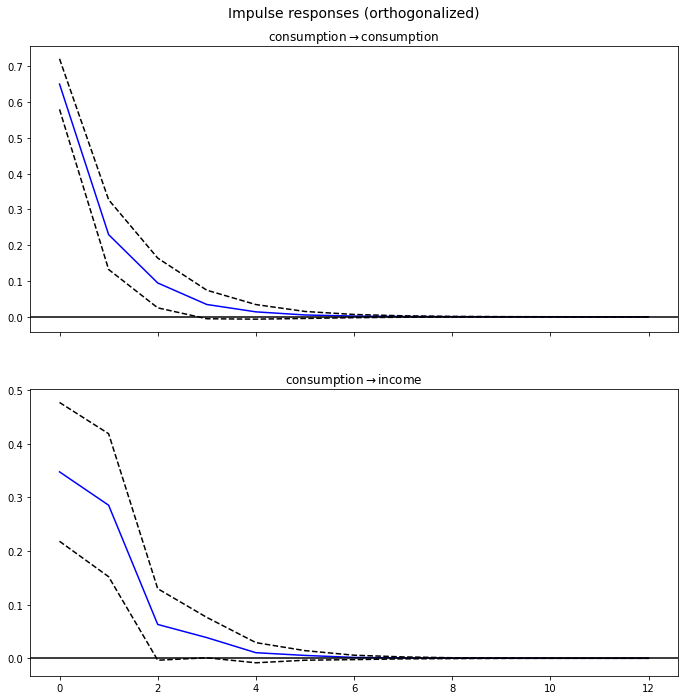

In [23]:
# Rによるインパルス応答関数
period=12
irf = res_var.irf(period)
irf.plot(orth=True, impulse='consumption');

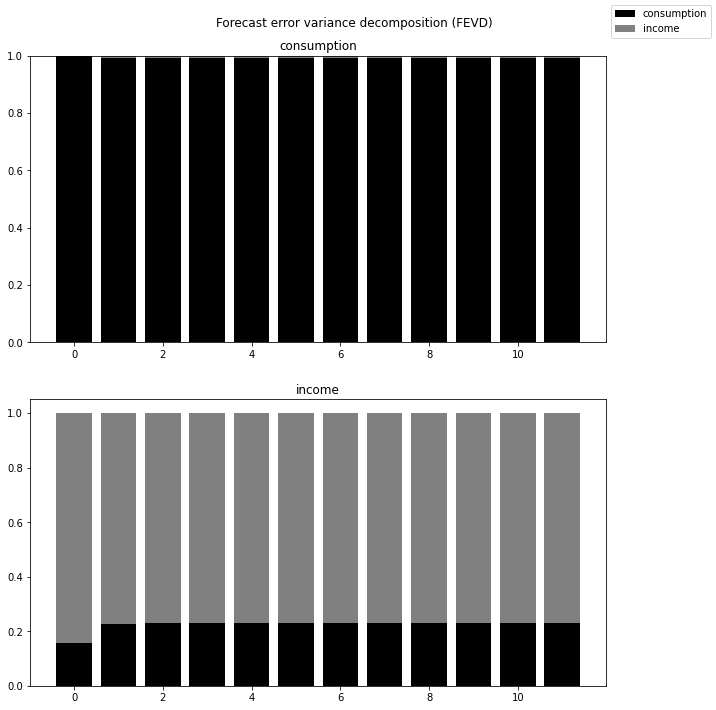

In [24]:
# 分散分解（Forecast Error Variance Decomposition (FEVD)）
fevd = res_var.fevd(period)
fevd.plot();

# 消費は収入の影響をほぼ受けないが、収入は1年たつと25%程消費の影響を受ける

## 第3部-3章 ARCH・GARCHモデルとその周辺

In [25]:
# 自己回帰条件付き分散不均一モデル（ARCH: Autoregressive Conditional Heteroscedasticity model）
# 絶対値の大きいなノイズが前回来たならば、今回の分散は大きくなると考える→データのブレ幅が広がる状況が持続する

# 一般化自己回帰条件付き分散不均一モデル（GARCH: Generalized ARCH model）


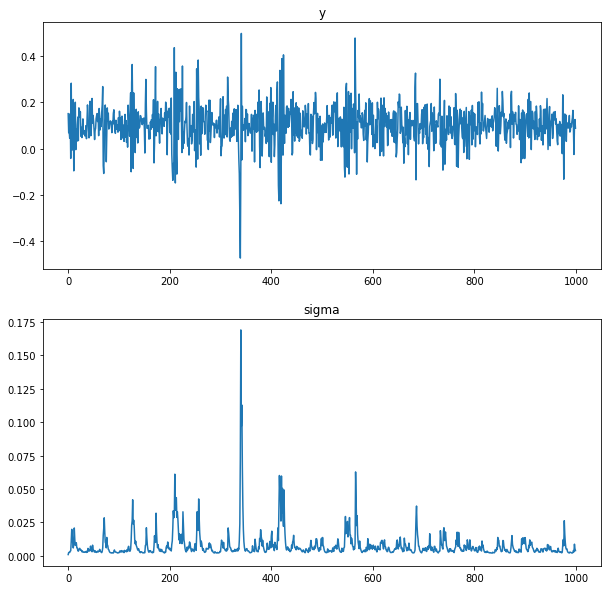

In [29]:
# シミュレーションによるデータの作成
# 自力
np.random.seed(1)
n_sample = 1000

omega = 0.001
alpha = 0.4
beta = 0.5
mu = 0.1
errors=np.random.normal(0,1,n_sample) 

y = np.zeros(n_sample)
u = np.zeros(n_sample)
h = np.zeros(n_sample)

h[0] = omega
u[0] = np.sqrt(h[0])*errors[0]
y[0] = mu + u[0]

for i in range(1, n_sample):
    # print(i)
    h[i] = omega + alpha * (u[i-1] ** 2) + beta * h[i-1]
    u[i] = np.sqrt(h[i])*errors[i]
    y[i] = mu + u[i]

t=range(n_sample)

sim_garch = pd.DataFrame({'h': h, 'u': u, 'y': y})
f, ax= plt.subplots(2,1, figsize=(10,10))
ax[0].plot(sim_garch['y'])
ax[1].plot(sim_garch['h'])
ax[0].set_title('y');
ax[1].set_title('sigma');



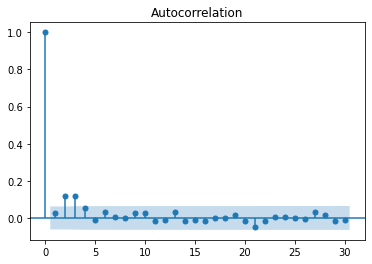

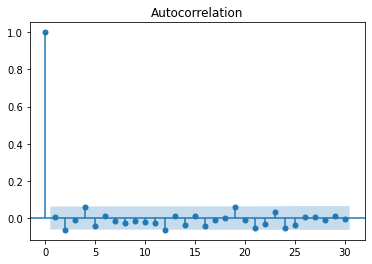

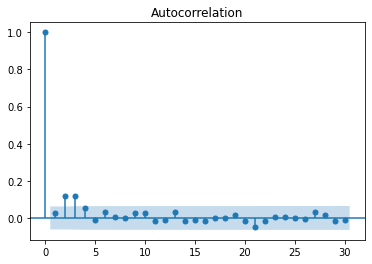

In [30]:
plot_acf(sim_garch['y'], lags=30);
plot_acf(sim_garch['y'] ** 2, lags=30);

# 二乗した系列のコレログラムでは、比較的大きな自己相関がある

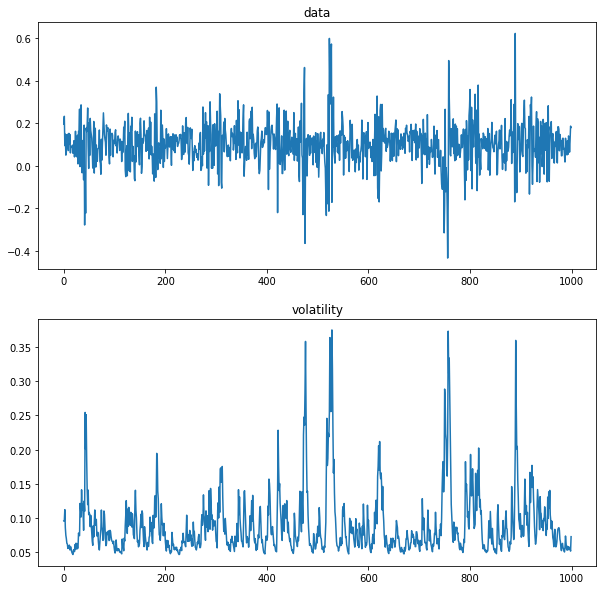

In [32]:
# シミュレーションによるデータの作成
# simulate関数を使用

sim_mod = arch_model(None)
params = {'mu': 0.1, 'omega': 0.001, 'alpha[1]': 0.4, 'beta[1]': 0.5}

params = pd.Series(params, index=params.keys())
params
sim_garch = sim_mod.simulate(params, 1000)

f, ax= plt.subplots(2,1, figsize=(10,10))
ax[0].plot(sim_garch['data'])
ax[1].plot(sim_garch['volatility'])
ax[0].set_title('data');
ax[1].set_title('volatility');

In [62]:
# GARCHモデル
mod_garch = arch_model(sim_garch['data']).fit(disp='off')
mod_garch.params

C:\Users\sk0ea\AppData\Local\Programs\Python\Python37\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0103. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


mu          0.100863
omega       0.001073
alpha[1]    0.465857
beta[1]     0.462686
Name: params, dtype: float64

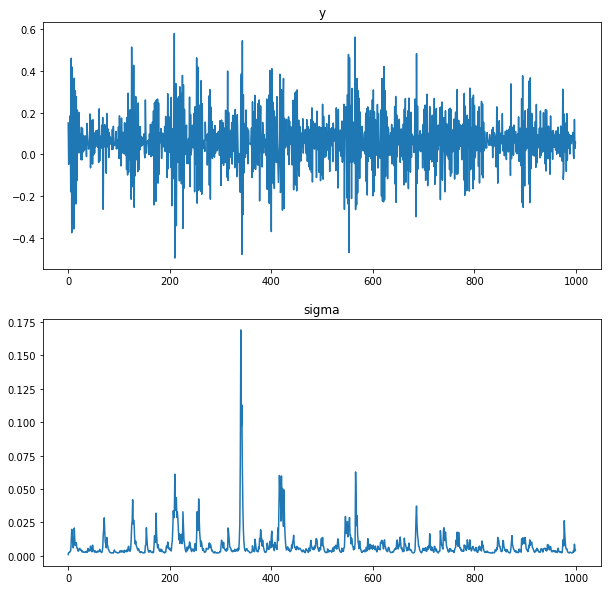

In [63]:
# ARMA-GARCHモデルのシミュレーション
# https://ichi.pro/python-o-shiyoshita-arima-garch-yosoku-134413039821823
# 自力
np.random.seed(1)
n_sample = 1000

omega = 0.001
alpha = 0.4
beta = 0.5
mu = 0.1
ar = -0.6
ma = -0.5
errors=np.random.normal(0,1,n_sample) 

y = np.zeros(n_sample)
u = np.zeros(n_sample)
h = np.zeros(n_sample)

h[0] = omega
u[0] = np.sqrt(h[0])*errors[0]
y[0] = mu + u[0]

for i in range(1, n_sample):
    h[i] = omega + alpha * (u[i-1] ** 2) + beta * h[i-1]
    u[i] = np.sqrt(h[i])*errors[i]
    y[i] = mu + ar * y[i-1] + ma * u[i-1] + u[i] #AR, MAの項を追加

t=range(n_sample)

sim_arma_garch = pd.DataFrame({'h': h, 'u': u, 'y': y})
f, ax= plt.subplots(2,1, figsize=(10,10))
ax[0].plot(sim_arma_garch['y'])
ax[1].plot(sim_arma_garch['h'])
ax[0].set_title('y');
ax[1].set_title('sigma');

C:\Users\sk0ea\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Ljunng-Box test
--------------------
     lb_stat  lb_pvalue  significance
0  31.419259        NaN         False
1   0.067065   0.795659         False
2   0.611215   0.736676         False
3   0.753073   0.860655         False
4   5.522373   0.237770         False

Jarque_Bera test
--------------------
                   value
jb_stat     6.459199e+02
jb_pvalue  5.498812e-141
skew       -3.303168e-01
kurtosis    6.881448e+00
significance: True


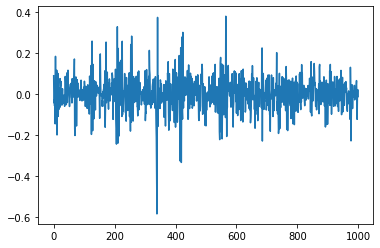

In [39]:
mod_arima = tsa.ARIMA(sim_arma_garch['y'],
                    order=[1, 0, 1]).fit()


# 残差の自己相関の検定
# Ljunng-Box test 残差に自己相関が残っていないことを検証する
# 帰無仮説: k時点まで離れたデータとの自己相関がすべて0
# 対立仮説: いずれかの相関係数が0ではない
print("Ljunng-Box test")
print("-"*20)
ljungbox = sm.stats.acorr_ljungbox(mod_arima.resid, lags=range(0,25), return_df=True)
ljungbox['significance'] = ljungbox['lb_pvalue'].apply(lambda x: x < 0.05)
print(ljungbox.head())
print()
# 残差の正規性の検定
# Jarque_Bera test 残差がホワイトノイズになっていることを検証する
# 帰無仮説: 正規分布に従う
# 対立仮説: 正規分布に従わない
print("Jarque_Bera test")
print("-"*20)
jarque_beta = sm.stats.jarque_bera(mod_arima.resid)
jarque_beta = pd.DataFrame({'value': jarque_beta}, index=['jb_stat', 'jb_pvalue', 'skew', 'kurtosis'])
print(jarque_beta)
print(f'significance: {jarque_beta.loc["jb_pvalue", "value"] < 0.05}')

# 残差のプロット
mod_arima.resid.plot();

# 残差には自己相関があるし、正規分布にも従わない

In [36]:
# ARMA-GARCHモデルの作成
meanMdl = ag.ARMA(order = {'AR':1,'MA':1})
volMdl = ag.garch(order = {'p':1,'q':1})
distMdl = ag.normalDist()

mod_arima_garch = ag.empModel(sim_arma_garch['y'].to_frame(), meanMdl, volMdl, distMdl)
mod_arima_garch.fit()


C:\Users\sk0ea\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\sk0ea\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmode

                         ARMA-GARCH estimation results                          
Dep Variable:                       y    R-squared:                       0.62
Mean Model:                      ARMA    Adj. R-squared:                  0.61
Vol Model:                      GARCH    Log Likelihood:                1006.1
Distribution:                Gaussian    AIC:                         -2000.21
Method:                            ML    BIC:                         -1970.76
                                         Num obs:                         1000
Date:                Wed, Sep 22 2021    Df Residuals:                     995
Time:                        21:29:05    Df Model:                           5
                                                                                
                                   Mean Model                                   
                            Estimate          Std. Error              t-stat
------------------------------------------------

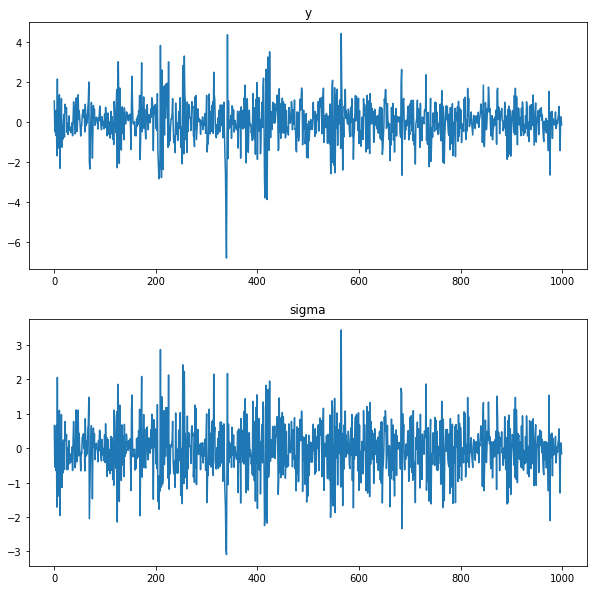

In [50]:
resid_arma = mod_arima.resid / np.sqrt(mod_arima.sigma2)
resid_arma_garch = mod_arima_garch.stres

f, ax= plt.subplots(2,1, figsize=(10,10))
ax[0].plot(resid_arma)
ax[1].plot(resid_arma_garch)
ax[0].set_title('y');
ax[1].set_title('sigma');

In [61]:
# GJRモデル
# Rのデータセット読み込み write_tsv(rownames_to_column(data.frame(spyreal), 'yyyy-mm-dd'), "spyreal.txt")
spyreal = pd.read_csv('input/spyreal.txt',
                index_col='yyyy-mm-dd',
                parse_dates=True,
                delimiter='\t')

spyreal

,SPY_OC,SPY_RK
yyyy-mm-dd,,
2002-01-02,0.005115,0.010045
2002-01-03,0.010151,0.005343
2002-01-04,0.000937,0.007979
2002-01-07,-0.009725,0.005773
2002-01-08,-0.003346,0.006453
...,...,...
2008-08-25,-0.013522,0.006786
2008-08-26,0.002829,0.007101
2008-08-27,0.007031,0.005592


In [74]:
mod_gjr = arch_model(spyreal['SPY_OC'], p=1, o=1, q=1,  power=1.0, dist="StudentsT").fit(disp="off")
# print(mod_gjr.params)
print(f'AIC: {mod_gjr.aic}')

mod_garch = arch_model(spyreal['SPY_OC'], p=1, q=1).fit(disp="off")
# print(mod_garch.params)
print(f'AIC: {mod_garch.aic}')

#GJRモデルの方がAICがわずかに小さくなる

AIC: -11006.947999940883
AIC: -11254.506058540313


C:\Users\sk0ea\AppData\Local\Programs\Python\Python37\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.827e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
C:\Users\sk0ea\AppData\Local\Programs\Python\Python37\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.827e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting r